In [466]:
# Imports
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import os
from tensorflow.keras import layers
import time

In [467]:
# Dummy Data
x_train = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12], [1, 2, 3]])
y_train = np.array([1, 0, 1, 0, 1])

In [468]:
# Callbacks
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20,
 restore_best_weights=True)

ReduceOnPlateau = keras.callbacks.ReduceLROnPlateau(
monitor='val_loss',
factor=0.1,
patience=10,
)

root_logdir = os.path.join(os.curdir, "logs")

def get_run_logdir():
 run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
 return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [469]:
# Model Architecture:
model = keras.models.Sequential([
 keras.layers.Dense(units=3, activation='relu'),
 layers.BatchNormalization(),
 keras.layers.Dense(units=32, activation='relu'),
 layers.BatchNormalization(),
 keras.layers.Dense(units=16, activation='relu'),
 layers.BatchNormalization(),
 keras.layers.Dense(units=1, activation='sigmoid'),
])

In [470]:
# Model Compilation
model.compile(loss="mse",
              optimizer="sgd",
              metrics=["accuracy"])


In [471]:
# Model Training
history = model.fit(x_train, y_train, batch_size=3, steps_per_epoch=1,
                    epochs=5,validation_split=0.2,
                    callbacks=[tensorboard_cb,early_stopping_cb,ReduceOnPlateau])

Epoch 1/5
1/1 [==============================] - 0s 365ms/step - loss: 0.3349 - accuracy: 0.6667 - val_loss: 0.2949 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 0.2499 - accuracy: 1.0000 - val_loss: 0.2950 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 0.6439 - accuracy: 0.0000e+00 - val_loss: 0.2697 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 0.2489 - accuracy: 1.0000 - val_loss: 0.2658 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 0.0744 - accuracy: 1.0000 - val_loss: 0.2579 - val_accuracy: 0.0000e+00 - lr: 0.0100


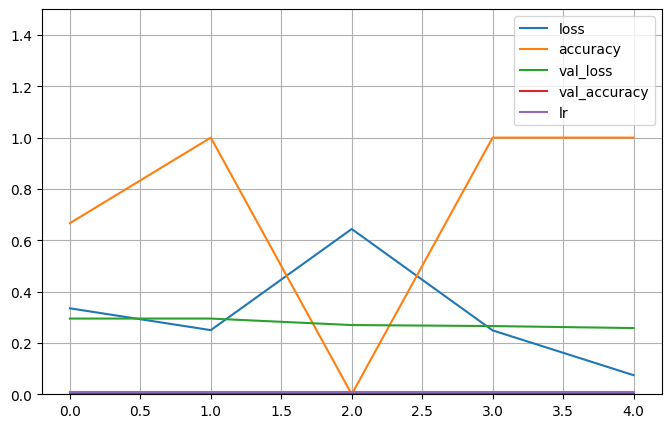

In [472]:
# Plot Metrics
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.5) # set the vertical range to [0-1]
plt.show()

# Inputing a Sample Train X

In [473]:
# Reading from the train csv
train_data = pd.read_csv('train.csv')

# Getting the first eeg and spectrogram data id respectively
eeg_id = train_data['eeg_id'][0]
spectrogram_id = train_data['spectrogram_id'][0]

# Getting the first label offset seconds for eeg and spectrogram respectively
eeg_label_offset_seconds = train_data['eeg_label_offset_seconds'][0]
spectrogram_label_offset_seconds = train_data['spectrogram_label_offset_seconds'][0]

# Defining the duration time for eeg and spectrogram respectively
eeg_duration = 10000
spectrogram_duration = 300

# Reading the eeg and spectrogram data with the aforementioned ids
eeg = pd.read_parquet(f'{eeg_id}.parquet')
spectrogram = pd.read_parquet(f'{spectrogram_id}.parquet')

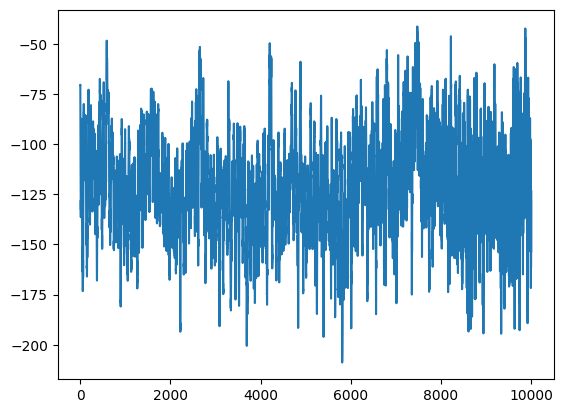

In [474]:
# Takes the 50 second sample of the eeg data
eeg = eeg.loc[eeg_label_offset_seconds : eeg_label_offset_seconds + eeg_duration - 1,]
eeg = eeg.to_numpy()
# Each row represents a time point with all the node.
# Each column represents a node at all time points one by one.
plt.plot(eeg[:,1])

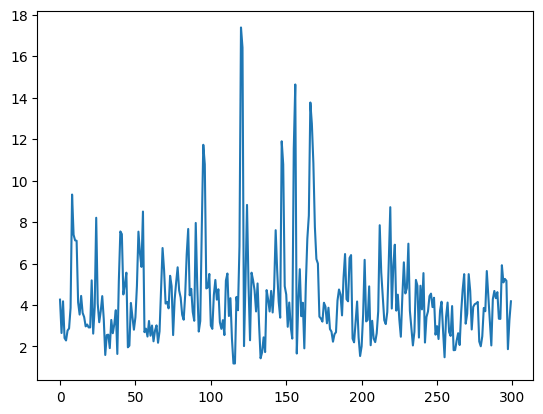

In [475]:
# Takes the 10 minute sample of the spectrogram data
spectrogram = spectrogram.loc[spectrogram_label_offset_seconds : spectrogram_label_offset_seconds + spectrogram_duration - 1,]
spectrogram = spectrogram.to_numpy()[:,1:] # Removing the time column
# Each row represents a time point with all the frequency.
# Each column represents a frequency at all time points one by one.
plt.plot(spectrogram[:,0])

In [476]:
eeg = eeg.T.flatten()
spectrogram = spectrogram.T.flatten()

In [477]:
# Votes for each class
seizure_vote = train_data['seizure_vote'][0]
lpd_vote = train_data['lpd_vote'][0]
gpd_vote = train_data['gpd_vote'][0]
lrda_vote = train_data['lrda_vote'][0]
grda_vote = train_data['grda_vote'][0]
other_vote = train_data['other_vote'][0]

In [478]:
# Defining the new X_train
x_train = np.array([seizure_vote, 
                    lpd_vote, 
                    gpd_vote, 
                    lrda_vote, 
                    grda_vote, 
                    other_vote])
x_train = np.concatenate((x_train, eeg, spectrogram))

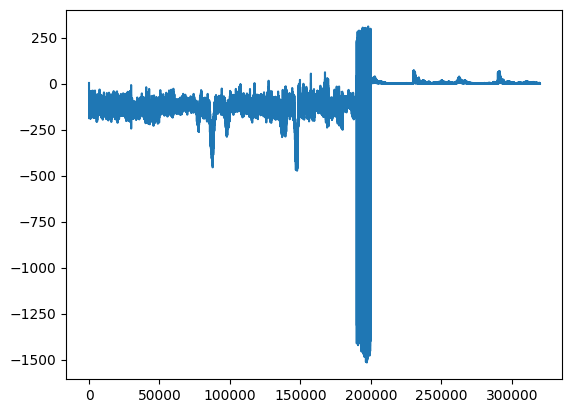

In [479]:
plt.plot(x_train)

In [480]:
x_train.size

320006